In [399]:
print("CKME 136: Capstone Course: Data Analytics, Big Data & Predictive Modeling.")  
print("Sentiment Analysis of Tweets for the US Airline Industry: A classification approach")
print("Donald T. Lane")

CKME 136: Capstone Course: Data Analytics, Big Data & Predictive Modeling.
Sentiment Analysis of Tweets for the US Airline Industry: A classification approach
Donald T. Lane


In [400]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter

In [401]:
raw_data = pd.read_csv('D:/COURSE_TEMP\capstone/airline_sentiment/Airline_twitter_data/tweets.csv')

In [402]:
raw_data.shape

(14640, 15)

In [403]:
raw_data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [404]:
raw_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640,NaN,NaN,NaN,5.69218e+17,7.79111e+14,5.67588e+17,5.68559e+17,5.69478e+17,5.6989e+17,5.70311e+17
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1,1,1
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522,NaN,NaN,NaN,0.638298,0.33044,0,0.3606,0.6706,1,1
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640,NaN,NaN,NaN,0.0826503,0.745778,0,0,0,0,44


In [405]:
raw_data[0:3]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [406]:
raw_data.drop(['tweet_id','negativereason', 'airline_sentiment_confidence', 'negativereason_confidence', 'airline', 'airline_sentiment_gold','negativereason_gold', 'name', 
               'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], 
              axis = 1, inplace = True)

In [407]:
raw_data.shape

(14640, 2)

In [408]:
raw_data[0:5]

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [409]:
#Convert text to lowercase in text field
raw_data['text'] = raw_data.text.str.lower()

In [410]:
raw_data[0:4]

,airline_sentiment,text
0,neutral,@virginamerica what @dhepburn said.
1,positive,@virginamerica plus you've added commercials t...
2,neutral,@virginamerica i didn't today... must mean i n...
3,negative,@virginamerica it's really aggressive to blast...


In [411]:
raw_data['norm_text'] = raw_data['text']

In [412]:
raw_data[0:4]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,@virginamerica what @dhepburn said.
1,positive,@virginamerica plus you've added commercials t...,@virginamerica plus you've added commercials t...
2,neutral,@virginamerica i didn't today... must mean i n...,@virginamerica i didn't today... must mean i n...
3,negative,@virginamerica it's really aggressive to blast...,@virginamerica it's really aggressive to blast...


In [413]:
#Clean up the dataset and prepare it for classifcation

In [414]:
#Remove the @User
raw_data['norm_text']= raw_data.norm_text.str.replace('\@[a-z0-9]+', ' ')

In [415]:
raw_data[0:4]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,what said.
1,positive,@virginamerica plus you've added commercials t...,plus you've added commercials to the experie...
2,neutral,@virginamerica i didn't today... must mean i n...,i didn't today... must mean i need to take a...
3,negative,@virginamerica it's really aggressive to blast...,"it's really aggressive to blast obnoxious ""e..."


In [416]:
# Remove Stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")

In [417]:
raw_data['norm_text'] = raw_data['norm_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [418]:
raw_data[0:4]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,said.
1,positive,@virginamerica plus you've added commercials t...,plus you've added commercials experience... ta...
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today... must mean need take another trip!
3,negative,@virginamerica it's really aggressive to blast...,"it's really aggressive blast obnoxious ""entert..."


In [419]:
#Remove URLs
raw_data['norm_text'] = raw_data.norm_text.str.replace('https?:\/\/.*[\r\n]*',' ')
raw_data['norm_text'] = raw_data.norm_text.str.replace('http:\/\/.*[\r\n]*',' ')
raw_data['norm_text'] = raw_data.norm_text.str.replace('http',' ')

In [420]:
raw_data[0:4]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,said.
1,positive,@virginamerica plus you've added commercials t...,plus you've added commercials experience... ta...
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today... must mean need take another trip!
3,negative,@virginamerica it's really aggressive to blast...,"it's really aggressive blast obnoxious ""entert..."


In [421]:
#Remove the Hashtags
raw_data['norm_text'] = raw_data.norm_text.str.replace('\#',' ')

In [422]:
raw_data[0:10]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,said.
1,positive,@virginamerica plus you've added commercials t...,plus you've added commercials experience... ta...
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today... must mean need take another trip!
3,negative,@virginamerica it's really aggressive to blast...,"it's really aggressive blast obnoxious ""entert..."
4,negative,@virginamerica and it's a really big bad thing...,it's really big bad thing
5,negative,@virginamerica seriously would pay $30 a fligh...,seriously would pay $30 flight seats didn't pl...
6,positive,"@virginamerica yes, nearly every time i fly vx...","yes, nearly every time fly vx “ear worm” won’t..."
7,neutral,@virginamerica really missed a prime opportuni...,really missed prime opportunity men without ha...
8,positive,"@virginamerica well, i didn't…but now i do! :-d","well, didn't…but do! :-d"
9,positive,"@virginamerica it was amazing, and arrived an ...","amazing, arrived hour early. you're good me."


In [423]:
#Remove the comma
raw_data['norm_text'] = raw_data.norm_text.str.replace('\,',' ')

In [424]:
raw_data[0:10]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,said.
1,positive,@virginamerica plus you've added commercials t...,plus you've added commercials experience... ta...
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today... must mean need take another trip!
3,negative,@virginamerica it's really aggressive to blast...,"it's really aggressive blast obnoxious ""entert..."
4,negative,@virginamerica and it's a really big bad thing...,it's really big bad thing
5,negative,@virginamerica seriously would pay $30 a fligh...,seriously would pay $30 flight seats didn't pl...
6,positive,"@virginamerica yes, nearly every time i fly vx...",yes nearly every time fly vx “ear worm” won’t...
7,neutral,@virginamerica really missed a prime opportuni...,really missed prime opportunity men without ha...
8,positive,"@virginamerica well, i didn't…but now i do! :-d",well didn't…but do! :-d
9,positive,"@virginamerica it was amazing, and arrived an ...",amazing arrived hour early. you're good me.


In [425]:
#Remove the semi colon
raw_data['norm_text'] = raw_data.norm_text.str.replace('\;[a-z0-9]+',' ')
raw_data['norm_text'] = raw_data.norm_text.str.replace(';',' ')                                                    

In [426]:
#Remove special characters without removing apostraphes
pattern=re.compile("[^\w']")
raw_data['norm_text'] = raw_data.norm_text.str.replace(pattern,' ')

In [427]:
raw_data[0:10]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,said
1,positive,@virginamerica plus you've added commercials t...,plus you've added commercials experience ta...
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today must mean need take another trip
3,negative,@virginamerica it's really aggressive to blast...,it's really aggressive blast obnoxious entert...
4,negative,@virginamerica and it's a really big bad thing...,it's really big bad thing
5,negative,@virginamerica seriously would pay $30 a fligh...,seriously would pay 30 flight seats didn't pl...
6,positive,"@virginamerica yes, nearly every time i fly vx...",yes nearly every time fly vx ear worm won t...
7,neutral,@virginamerica really missed a prime opportuni...,really missed prime opportunity men without ha...
8,positive,"@virginamerica well, i didn't…but now i do! :-d",well didn't but do d
9,positive,"@virginamerica it was amazing, and arrived an ...",amazing arrived hour early you're good me


In [428]:
#Remove the colon
raw_data['norm_text'] = raw_data.norm_text.str.replace('\:[a-z0-9]+',' ')
raw_data['norm_text'] = raw_data.norm_text.str.replace(':+',' ')

In [429]:
#Remove the amphersand
raw_data['norm_text'] = raw_data.norm_text.str.replace('&',' ')

In [430]:
raw_data[0:10]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,said
1,positive,@virginamerica plus you've added commercials t...,plus you've added commercials experience ta...
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today must mean need take another trip
3,negative,@virginamerica it's really aggressive to blast...,it's really aggressive blast obnoxious entert...
4,negative,@virginamerica and it's a really big bad thing...,it's really big bad thing
5,negative,@virginamerica seriously would pay $30 a fligh...,seriously would pay 30 flight seats didn't pl...
6,positive,"@virginamerica yes, nearly every time i fly vx...",yes nearly every time fly vx ear worm won t...
7,neutral,@virginamerica really missed a prime opportuni...,really missed prime opportunity men without ha...
8,positive,"@virginamerica well, i didn't…but now i do! :-d",well didn't but do d
9,positive,"@virginamerica it was amazing, and arrived an ...",amazing arrived hour early you're good me


In [431]:
#Remove words that have 3 or less letters
shortword = re.compile(r'\b\w{1,3}\b') #r'\W*\b\w{1,3}\b'
raw_data['norm_text'] = raw_data.norm_text.str.replace(shortword,' ')

In [432]:
raw_data['norm_text'] = raw_data.norm_text.str.replace('\'','')

In [433]:
raw_data['norm_text'] = raw_data.norm_text.str.replace('didn',"didn't")

In [434]:
raw_data[0:10]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,said
1,positive,@virginamerica plus you've added commercials t...,plus added commercials experience tacky
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today must mean need take another t...
3,negative,@virginamerica it's really aggressive to blast...,really aggressive blast obnoxious entertai...
4,negative,@virginamerica and it's a really big bad thing...,really thing
5,negative,@virginamerica seriously would pay $30 a fligh...,seriously would flight seats didn't play...
6,positive,"@virginamerica yes, nearly every time i fly vx...",nearly every time worm away
7,neutral,@virginamerica really missed a prime opportuni...,really missed prime opportunity without hats...
8,positive,"@virginamerica well, i didn't…but now i do! :-d",well didn't
9,positive,"@virginamerica it was amazing, and arrived an ...",amazing arrived hour early good


In [435]:
#Remove periods
raw_data['norm_text'] = raw_data.norm_text.str.replace('\.+',' ')
raw_data['norm_text'] = raw_data.norm_text.str.replace('.',' ')

In [436]:
#Remove dashes
raw_data['norm_text'] = raw_data.norm_text.str.replace('-',' ')

In [437]:
#Remove question marks, exlamation points, dollar signs
raw_data['norm_text'] = raw_data.norm_text.str.replace('!+','')
raw_data['norm_text'] = raw_data.norm_text.str.replace('\?+','')
raw_data['norm_text'] = raw_data.norm_text.str.replace('?','')
raw_data['norm_text'] = raw_data.norm_text.str.replace('$','')
raw_data['norm_text'] = raw_data.norm_text.str.replace('(','')
raw_data['norm_text'] = raw_data.norm_text.str.replace(')','')
raw_data['norm_text'] = raw_data.norm_text.str.replace('"\w+','')

In [438]:
raw_data['norm_text'] = raw_data.norm_text.str.replace('[0-9]+',' ')

In [439]:
myre = re.compile(u'('
    u'\ud83c[\udf00-\udfff]|'
    u'\ud83d[\udc00-\ude4f\ude80-\udeff]|'
    u'[\u2600-\u26FF\u2700-\u27BF])+', 
    re.UNICODE)
raw_data['norm_text'] = raw_data.norm_text.str.replace(myre,' ')

In [440]:
myre2 = re.compile(u'['
    u'\U0001F300-\U0001F64F'
    u'\U0001F680-\U0001F6FF'
    u'\u2600-\u26FF\u2700-\u27BF]+', 
    re.UNICODE)
raw_data['norm_text'] = raw_data.norm_text.str.replace(myre2,' ')

In [441]:
#Remove extra whitespaces
raw_data['norm_text'] = raw_data.norm_text.str.replace(' +',' ')

In [443]:
raw_data[0:20]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,said
1,positive,@virginamerica plus you've added commercials t...,plus added commercials experience tacky
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today must mean need take another trip
3,negative,@virginamerica it's really aggressive to blast...,really aggressive blast obnoxious entertainme...
4,negative,@virginamerica and it's a really big bad thing...,really thing
5,negative,@virginamerica seriously would pay $30 a fligh...,seriously would flight seats didn't playing re...
6,positive,"@virginamerica yes, nearly every time i fly vx...",nearly every time worm away
7,neutral,@virginamerica really missed a prime opportuni...,really missed prime opportunity without hats p...
8,positive,"@virginamerica well, i didn't…but now i do! :-d",well didn't
9,positive,"@virginamerica it was amazing, and arrived an ...",amazing arrived hour early good


In [444]:
raw_data['norm_text'] = raw_data.norm_text.str.replace('\b[^\W\d][^\W\d]+\b','')

In [445]:
raw_data[0:4]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,said
1,positive,@virginamerica plus you've added commercials t...,plus added commercials experience tacky
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today must mean need take another trip
3,negative,@virginamerica it's really aggressive to blast...,really aggressive blast obnoxious entertainme...


In [446]:
#BACKUP OF THE RAWDATA SET AT THIS STEP
raw_data.to_csv('D:/COURSE_TEMP/capstone/airline_sentiment/phase3/int_files/airline_cleaned.csv', sep=',')

In [447]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\troylane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [448]:
# Remove Stopwords - a second time after cleaning.  Only applicable to unigrams and tf-idf
from nltk.corpus import stopwords
stop = stopwords.words("english")

In [449]:
raw_data['norm_text'] = raw_data['norm_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [450]:
raw_data[0:4]

,airline_sentiment,text,norm_text
0,neutral,@virginamerica what @dhepburn said.,said
1,positive,@virginamerica plus you've added commercials t...,plus added commercials experience tacky
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today must mean need take another trip
3,negative,@virginamerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...


In [451]:
#BACKUP OF THE RAWDATA SET AT THIS STEP
raw_data.to_csv('D:/COURSE_TEMP/capstone/airline_sentiment/phase3/int_files/airline_prep2.csv', sep=',')
#BACKUP OF THE TRAIN DATA SET AT TTHIS STEP
#train.to_csv('D:/COURSE_TEMP/capstone/airline_sentiment/phase3/int_files/train.csv', sep=',')
#BACKUP OF THE TEST DATA SET AT TTHIS STEP
#test.to_csv('D:/COURSE_TEMP/capstone/airline_sentiment/phase3/int_files/test.csv', sep=',')

In [452]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

In [454]:
#Get the top 20 words for the full data set.
all_words = pd.Series([y for x in raw_data.norm_text.values.flatten() for y in x.split()]).value_counts()

In [455]:
all_words[0:20]

flight       3953
thanks       1080
cancelled    1065
service       966
help          872
time          793
customer      758
hours         683
flights       648
hold          642
plane         637
thank         604
still         581
please        569
would         561
need          555
delayed       545
back          524
gate          519
call          516
dtype: int64

In [456]:
#Create positive, nuetral, and negative files
positive_words = raw_data[(raw_data.airline_sentiment=='positive')]
negative_words = raw_data[(raw_data.airline_sentiment=='negative')]
neutral_words = raw_data[(raw_data.airline_sentiment=='neutral')]


In [457]:
positive_words[0:3]

,airline_sentiment,text,norm_text
1,positive,@virginamerica plus you've added commercials t...,plus added commercials experience tacky
6,positive,"@virginamerica yes, nearly every time i fly vx...",nearly every time worm away
8,positive,"@virginamerica well, i didn't…but now i do! :-d",well didn't


In [458]:
#Get the top 20 words for the positive tweets.
top_pos = pd.Series([y for x in positive_words.norm_text.values.flatten() for y in x.split()]).value_counts()

In [459]:
#Get the top 20 words for the negative tweets.
top_neg = pd.Series([y for x in negative_words.norm_text.values.flatten() for y in x.split()]).value_counts()

In [460]:
#Get the top 20 words for the neutral tweets.
top_neut = pd.Series([y for x in neutral_words.norm_text.values.flatten() for y in x.split()]).value_counts()

In [461]:
top_pos[0:20]

thanks      610
thank       454
flight      381
great       234
service     162
love        134
customer    114
much        109
good        109
guys        109
best        105
awesome     100
time         97
help         84
today        83
airline      80
amazing      78
back         73
crew         70
flying       70
dtype: int64

In [462]:
top_neg[0:20]

flight       2956
cancelled     926
service       749
hours         658
help          618
customer      614
hold          612
time          598
plane         531
delayed       508
still         490
call          462
hour          456
flightled     448
flights       420
gate          411
late          378
would         377
back          374
need          374
dtype: int64

In [463]:
top_neut[0:20]

flight       616
please       181
help         170
flights      168
need         163
thanks       155
would        123
tomorrow     109
fleek        106
fleet        103
cancelled    101
know          99
time          98
change        88
flying        77
number        77
back          77
like          77
today         77
check         74
dtype: int64

In [464]:
#Create word clouds for each class

In [465]:
import pip
pip.main(['install', 'wordcloud'])
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS

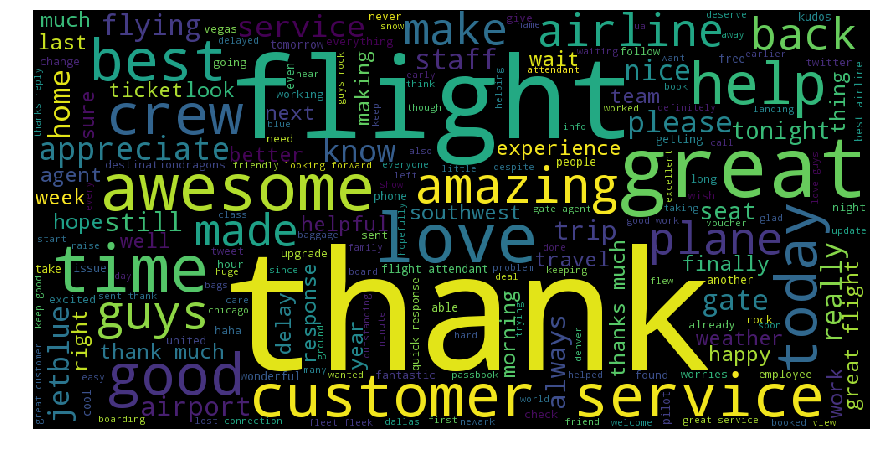

In [466]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words['norm_text']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

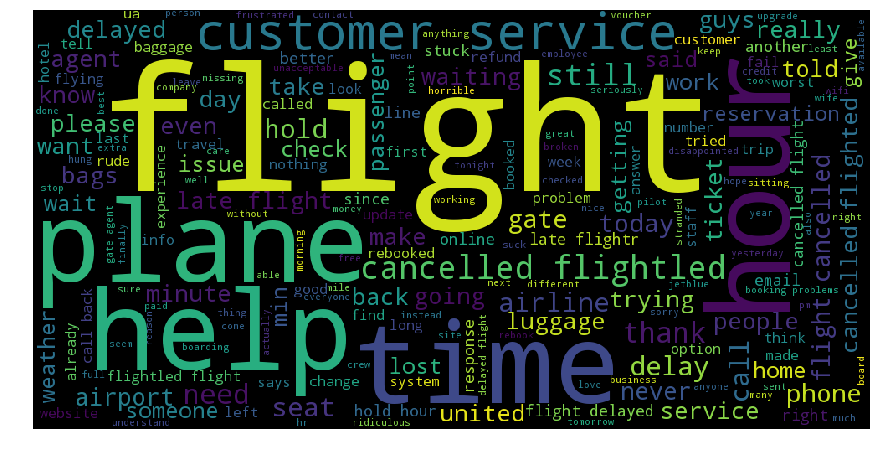

In [467]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words['norm_text']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

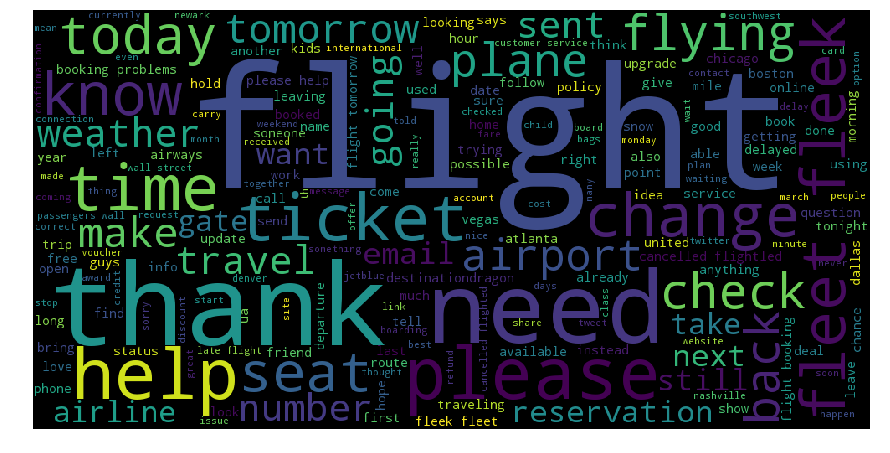

In [468]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(neutral_words['norm_text']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [469]:
#-----------Begin to perform Classification----------------#

In [470]:
#rename dataset for classificcation using multiclass (3 classes - negative, neutral, positive)
raw_data_negneupos = raw_data
raw_data_negneupos.shape

(14640, 3)

In [471]:
def convert_word(row):
    sentiment = []
    text = row['airline_sentiment']
    if "positive" in text:
        sentiment.append('1')
    elif "negative" in text:
        sentiment.append('-1')
    elif "neutral" in text:
        sentiment.append('0')
    return (sentiment)
raw_data_negneupos['sentiment'] = raw_data_negneupos.apply(convert_word, axis = 1)

In [472]:
raw_data_negneupos[0:4]

,airline_sentiment,text,norm_text,sentiment
0,neutral,@virginamerica what @dhepburn said.,said,[0]
1,positive,@virginamerica plus you've added commercials t...,plus added commercials experience tacky,[1]
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today must mean need take another trip,[0]
3,negative,@virginamerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...,[-1]


In [473]:
#Convert object datatype to integer
raw_data_negneupos['sentiment'] = raw_data_negneupos['sentiment'].apply(lambda x: ', '.join(x))

In [474]:
raw_data_negneupos['sentiment'] = raw_data_negneupos['sentiment'].astype(str).astype(int)

In [475]:
raw_data_negneupos['sentiment'].dtype.kind 

'i'

In [476]:
raw_data_negneupos.shape

(14640, 4)

In [477]:
raw_data_negneupos[0:4]

,airline_sentiment,text,norm_text,sentiment
0,neutral,@virginamerica what @dhepburn said.,said,0
1,positive,@virginamerica plus you've added commercials t...,plus added commercials experience tacky,1
2,neutral,@virginamerica i didn't today... must mean i n...,didn't today must mean need take another trip,0
3,negative,@virginamerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...,-1


In [478]:
#Create a dataset with only 2 classes (negative and positive)
raw_data_negpos = raw_data[(raw_data.airline_sentiment=='positive') | (raw_data.airline_sentiment=='negative')]
raw_data_negpos.shape

(11541, 4)

In [479]:
raw_data_negpos[0:4]

,airline_sentiment,text,norm_text,sentiment
1,positive,@virginamerica plus you've added commercials t...,plus added commercials experience tacky,1
3,negative,@virginamerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...,-1
4,negative,@virginamerica and it's a really big bad thing...,really thing,-1
5,negative,@virginamerica seriously would pay $30 a fligh...,seriously would flight seats didn't playing re...,-1


In [480]:
def convert_word(row):
    sentiment = []
    text = row['airline_sentiment']
    if "positive" in text:
        sentiment.append('1')
    elif "negative" in text:
        sentiment.append('-1')
    return (sentiment)
raw_data_negpos['sentiment'] = raw_data_negpos.apply(convert_word, axis = 1)

C:\Users\troylane\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [481]:
raw_data_negpos[0:4]

,airline_sentiment,text,norm_text,sentiment
1,positive,@virginamerica plus you've added commercials t...,plus added commercials experience tacky,[1]
3,negative,@virginamerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...,[-1]
4,negative,@virginamerica and it's a really big bad thing...,really thing,[-1]
5,negative,@virginamerica seriously would pay $30 a fligh...,seriously would flight seats didn't playing re...,[-1]


In [482]:
#Convert object datatype to integer
raw_data_negpos['sentiment'] = raw_data_negpos['sentiment'].apply(lambda x: ', '.join(x))

C:\Users\troylane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [483]:
raw_data_negpos['sentiment'] = raw_data_negpos['sentiment'].astype(str).astype(int)

C:\Users\troylane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [484]:
raw_data_negpos['sentiment'].dtype.kind 

'i'

In [485]:
raw_data_negpos.shape

(11541, 4)

In [486]:
raw_data_negpos[0:4]

,airline_sentiment,text,norm_text,sentiment
1,positive,@virginamerica plus you've added commercials t...,plus added commercials experience tacky,1
3,negative,@virginamerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...,-1
4,negative,@virginamerica and it's a really big bad thing...,really thing,-1
5,negative,@virginamerica seriously would pay $30 a fligh...,seriously would flight seats didn't playing re...,-1


In [487]:
##-----Multiclass - Multinomial Naive Bayes classification - unigrams - 3000 word limit.----------##
##________________________________________________________________________________________________##

In [488]:
#Assign applicable columns to new variable to prepare for classifier
X = raw_data_negneupos.norm_text
y = raw_data_negneupos.sentiment

In [489]:
# split the data into training and test data sets (75:25)
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#split data (another technique) - tried and works - maintaining in here for reference
y_train=y.sample(frac=0.75,random_state=200)
y_test=y.drop(y_train.index)
X_train=X.sample(frac=0.75, random_state=200)
X_test=X.drop(X_train.index)

In [490]:
X_train.shape

(10980,)

In [491]:
X_test.shape

(3660,)

In [492]:
y_train.shape

(10980,)

In [493]:
y_test.shape

(3660,)

In [494]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [495]:
# instantiate CountVectorizer
#using unigram model - most frequent 3000 words
#baseline classifier will be based on this approach - Notes from meeting with Kanchana)
stop = set(stopwords.words('english'))
vect = CountVectorizer(stop_words=stop, max_features = 3000)

In [496]:
# fit and transform X_train into X_train_fit
X_train_fit = vect.fit_transform(X_train)
X_train_fit.shape

(10980, 3000)

In [497]:
# transform X_test into X_test_fit
X_test_fit = vect.transform(X_test)
X_test_fit.shape

(3660, 3000)

In [498]:
# import and instantiate Multinomial NB classifier
nb = MultinomialNB()

In [499]:
#Accuracy - 10-fold cross validation on training data set.  y score for each fold. 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train_fit, y_train, cv=10)
scores

array([ 0.74818182,  0.7488626 ,  0.7588717 ,  0.7431694 ,  0.73952641,
        0.72859745,  0.73108478,  0.76025524,  0.77484047,  0.75205105])

In [500]:
nb.fit(X_train_fit, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [501]:
# make class predictions for X train set - training accuracy, as per notes with Kanchana
y_pred_class_train = nb.predict(X_train_fit)

In [502]:
# calculate accuracy of training data set (note: not 10-fold cross validation)
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred_class_train)

0.81329690346083794

In [503]:
# make class predictions for test data set
y_pred_class = nb.predict(X_test_fit)

In [504]:
# calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.76530054644808743

In [505]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[2048,  148,   91],
       [ 375,  351,   60],
       [ 132,   53,  402]])

In [506]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

         -1       0.80      0.90      0.85      2287
          0       0.64      0.45      0.52       786
          1       0.73      0.68      0.71       587

avg / total       0.75      0.77      0.75      3660



In [507]:
# calculate null accuracy
y_test.value_counts().head() / len(y_test)

-1    0.624863
 0    0.214754
 1    0.160383
Name: sentiment, dtype: float64

In [255]:
#ROC_AUC cannot be applied to multi-class dataset
#roc_auc_score(y_test, nb.predict_proba(X_test_fit)[:,1])

In [256]:
##-----Bi-class- Multinomial Naive Bayes classification - unigrams - 3000 word limit.----------##
##_____________________________________________________________________________________________##

In [508]:
#Assign applicable columns to new variable to prepare for classifier
X1 = raw_data_negpos.norm_text
y1 = raw_data_negpos.sentiment

In [509]:
# split the data into training and test data sets (75:25)
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#split data (another technique) - tried and works - maintaining in here for reference
y1_train=y1.sample(frac=0.75,random_state=200)
y1_test=y1.drop(y1_train.index)
X1_train=X1.sample(frac=0.75, random_state=200)
X1_test=X1.drop(X1_train.index)

In [510]:
X1_train.shape


(8656,)

In [511]:
X1_test.shape

(2885,)

In [512]:
y1_train.shape

(8656,)

In [513]:
y1_test.shape

(2885,)

In [514]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [515]:
# instantiate CountVectorizer
#using unigram model 
#baseline classifier will be based on this approach - Notes from meeting with Kanchana)
stop = set(stopwords.words('english'))
vect1 = CountVectorizer(stop_words=stop, max_features = 3000)

#stop = set(stopwords.words('english'))
#vect2 = TfidfVectorizer(use_idf=True, min_df=5, max_df = 0.8, max_features=2000)#, stop_words=stop)
#use_idf – weight factor must use inverse document frequency
#min_df – remove the words from the vocabulary which have occurred in less than ‘min_df’ number of tweets.
#max_df – remove the words from the vocabulary which have occurred in more than ‘max_df’ * total number of tweets in dataset
#max_features – choose maximum number of words to be kept in vocabulary ordered by term frequency.

In [516]:
# fit and transform X_train into X_train_fit
X1_train_fit = vect1.fit_transform(X1_train)
X1_train_fit.shape

(8656, 3000)

In [517]:
# transform X_test into X_test_fit
X1_test_fit = vect1.transform(X1_test)
X1_test_fit.shape

(2885, 3000)

In [518]:
# import and instantiate MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [519]:
#Accurac10-fold cross validation on trainig data set.  y score for each fold. 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X1_train_fit, y1_train, cv=10)
scores

array([ 0.89850058,  0.91234141,  0.89734717,  0.8867052 ,  0.89364162,
        0.89248555,  0.89942197,  0.91213873,  0.9017341 ,  0.9017341 ])

In [520]:
nb.fit(X1_train_fit, y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [521]:
# make class predictions for X train set - training accuracy, as per notes with Kanchana
y1_pred_class_train = nb.predict(X1_train_fit)

In [522]:
# calculate accuracy of training data set (note: not 10-fold cross validation)
from sklearn import metrics
metrics.accuracy_score(y1_train, y1_pred_class_train)

0.93241682070240295

In [523]:
# make class predictions for test data fit
y1_pred_class = nb.predict(X1_test_fit)

In [524]:
# calculate accuracy of class predictions
metrics.accuracy_score(y1_test, y1_pred_class)

0.91022530329289431

In [525]:
# print the confusion matrix
metrics.confusion_matrix(y1_test, y1_pred_class)

array([[2230,   95],
       [ 164,  396]])

In [526]:
# print the classification report
print(metrics.classification_report(y1_test, y1_pred_class))

             precision    recall  f1-score   support

         -1       0.93      0.96      0.95      2325
          1       0.81      0.71      0.75       560

avg / total       0.91      0.91      0.91      2885



In [527]:
# calculate null accuracy
y1_test.value_counts().head() / len(y1_test)


-1    0.805893
 1    0.194107
Name: sentiment, dtype: float64

In [277]:
roc_auc_score(y1_test, nb.predict_proba(X1_test_fit)[:,1])

0.9459358678955454

In [ ]:
##-----------Multiclass  -  Naive Bayes, unigrams 500 --------------------##
##________________________________________________________________________##

In [528]:
# instantiate CountVectorizer
#using unigram model - most frequent 500 words
#baseline classifier will be based on this approach - Notes from meeting with Kanchana)
stop = set(stopwords.words('english'))
vect = CountVectorizer(stop_words=stop, max_features = 500)

In [529]:
# fit and transform X_train into X_train_fit
X_train_fit = vect.fit_transform(X_train)
X_train_fit.shape

(10980, 500)

In [530]:
# transform X_test into X_test_fit
X_test_fit = vect.transform(X_test)
X_test_fit.shape

(3660, 500)

In [531]:
# transform X_test into X_test_fit
X_test_fit = vect.transform(X_test)
X_test_fit.shape

(3660, 500)

In [532]:
# import and instantiate Multinomial NB classifier
nb = MultinomialNB()

In [535]:
#Accuracy - 10-fold cross validation on training data set.  y score for each fold. 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train_fit, y_train, cv=10)
scores

array([ 0.71181818,  0.7133758 ,  0.73066424,  0.70673953,  0.71129326,
        0.69763206,  0.68003646,  0.7183227 ,  0.73564266,  0.71194166])

In [536]:
nb.fit(X_train_fit, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [537]:
# make class predictions for X train set - training accuracy, as per notes with Kanchana
y_pred_class_train = nb.predict(X_train_fit)

In [538]:
# calculate accuracy of training data set (note: not 10-fold cross validation)
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred_class_train)

0.73096539162112928

In [539]:
# make class predictions for test data set
y_pred_class = nb.predict(X_test_fit)

In [540]:
# calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.72185792349726774

In [541]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1968,  215,  104],
       [ 432,  307,   47],
       [ 164,   56,  367]])

In [542]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

         -1       0.77      0.86      0.81      2287
          0       0.53      0.39      0.45       786
          1       0.71      0.63      0.66       587

avg / total       0.71      0.72      0.71      3660



In [543]:
# calculate null accuracy
y_test.value_counts().head() / len(y_test)

-1    0.624863
 0    0.214754
 1    0.160383
Name: sentiment, dtype: float64

In [544]:
#ROC_AUC cannot be applied to multi-class dataset
#roc_auc_score(y_test, nb.predict_proba(X_test_fit)[:,1])

In [545]:
##-----Bi-class- Multinomial Naive Bayes classification - unigrams - 500 word limit.----------##
##____________________________________________________________________________________________##

In [546]:
# instantiate CountVectorizer
#using unigram model 
stop = set(stopwords.words('english'))
vect1 = CountVectorizer(stop_words=stop, max_features = 500)

#stop = set(stopwords.words('english'))
#vect2 = TfidfVectorizer(use_idf=True, min_df=5, max_df = 0.8, max_features=2000)#, stop_words=stop)
#use_idf – weight factor must use inverse document frequency
#min_df – remove the words from the vocabulary which have occurred in less than ‘min_df’ number of tweets.
#max_df – remove the words from the vocabulary which have occurred in more than ‘max_df’ * total number of tweets in dataset
#max_features – choose maximum number of words to be kept in vocabulary ordered by term frequency.

In [547]:
# fit and transform X_train into X_train_fit
X1_train_fit = vect1.fit_transform(X1_train)
X1_train_fit.shape

(8656, 500)

In [548]:
# transform X_test into X_test_fit
X1_test_fit = vect1.transform(X1_test)
X1_test_fit.shape

(2885, 500)

In [549]:
# transform X_test into X_test_fit
X1_test_fit = vect1.transform(X1_test)
X1_test_fit.shape

(2885, 500)

In [550]:
# import and instantiate MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [551]:
#Accurac10-fold cross validation on trainig data set.  y score for each fold. 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X1_train_fit, y1_train, cv=10)
scores

array([ 0.87889273,  0.88119954,  0.89042676,  0.87283237,  0.89248555,
        0.88439306,  0.87283237,  0.89942197,  0.87745665,  0.88554913])

In [552]:
nb.fit(X1_train_fit, y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [553]:
# make class predictions for X train set - training accuracy, as per notes with Kanchana
y1_pred_class_train = nb.predict(X1_train_fit)

In [554]:
# calculate accuracy of training model using train, test split
from sklearn import metrics
metrics.accuracy_score(y1_train, y1_pred_class_train)

0.89394639556377076

In [555]:
# make class predictions for X_test_fit
y1_pred_class = nb.predict(X1_test_fit)

In [556]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y1_test, y1_pred_class)

0.8876949740034662

In [557]:
# print the confusion matrix
metrics.confusion_matrix(y1_test, y1_pred_class)

array([[2194,  131],
       [ 193,  367]])

In [558]:
# print the classification report
print(metrics.classification_report(y1_test, y1_pred_class))

             precision    recall  f1-score   support

         -1       0.92      0.94      0.93      2325
          1       0.74      0.66      0.69       560

avg / total       0.88      0.89      0.89      2885



In [559]:
# calculate null accuracy
y1_test.value_counts().head(2) / y1_test.shape

-1    0.805893
 1    0.194107
Name: sentiment, dtype: float64

In [560]:
roc_auc_score(y1_test, nb.predict_proba(X1_test_fit)[:,1])

0.92571390168970813

In [ ]:
##-----Multiclass - Multinomial Naive Bayes classification - TF-IDF --------##
#____________________________________________________________________________#

In [561]:
# instantiate CountVectorizer
#Solution 2 using TF-IDF, using all features
#vect = CountVectorizer()

vect2 = TfidfVectorizer(use_idf=True, min_df=5, max_df = 0.8)
#use_idf – weight factor must use inverse document frequency
#min_df – remove the words from the vocabulary which have occurred in less than ‘min_df’ number of tweets.
#max_df – remove the words from the vocabulary which have occurred in more than ‘max_df’ * total number of tweets in dataset
#max_features – choose maximum number of words to be kept in vocabulary ordered by term frequency.

In [562]:
# fit and transform X_train into X_train_fit
X_train_fit = vect2.fit_transform(X_train)
X_train_fit.shape

(10980, 2012)

In [563]:
# transform X_test into X_test_fit
X_test_fit = vect2.transform(X_test)
X_test_fit.shape

(3660, 2012)

In [564]:
#Top features in the TF-IDF vector
indices = np.argsort(vect2.idf_)[::-1]
features = vect2.get_feature_names()
top_n = 25
top_features = [features[i] for i in indices[:top_n]]
print (top_features)

['zurich', 'dealt', 'requesting', 'reserv', 'desperately', 'irritated', 'responsive', 'ripped', 'rough', 'degree', 'decided', 'data', 'reported', 'dang', 'scale', 'scavenger', 'scheduling', 'custserv', 'curious', 'crash', 'selfie', 'cranky', 'died', 'digital', 'served']


In [565]:
# import and instantiate MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [566]:
#Accuracy score for each fold, using 10-fold cross validation on trainig data set
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train_fit, y_train, cv=10)
scores

array([ 0.72818182,  0.74431301,  0.74067334,  0.73041894,  0.74408015,
        0.72222222,  0.72743847,  0.74567001,  0.74020055,  0.74384686])

In [567]:
nb.fit(X_train_fit, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [568]:
# make class predictions for X train set - training accuracy, as per notes with Kanchana
y_pred_class_train = nb.predict(X_train_fit)

In [569]:
#calculate accuracy of training model using train, test split
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred_class_train)

0.77559198542805097

In [570]:
# make class predictions for X_test_fit
y_pred_class = nb.predict(X_test_fit)

In [571]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7368852459016394

In [572]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[2233,   37,   17],
       [ 569,  190,   27],
       [ 274,   39,  274]])

In [247]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

         -1       0.73      0.98      0.83      2287
          0       0.71      0.24      0.36       786
          1       0.86      0.47      0.60       587

avg / total       0.75      0.74      0.69      3660



In [248]:
#ROC_AUC cannot be applied to multi-class dataset
#roc_auc_score(y_test, nb.predict_proba(X_test_fit)[:,1])

In [ ]:
##---------Multinomial Naive Bayes, TF-IDF, 2 class ----------------##
##__________________________________________________________________##

In [750]:
# instantiate TFIDFVectorizer
#Solution 2 using TF-IDF with limit of fearues set to 2000
#vect = CountVectorizer()
vect2 = TfidfVectorizer(use_idf=True, min_df=5, max_df = 0.8)
#use_idf – weight factor must use inverse document frequency
#min_df – remove the words from the vocabulary which have occurred in less than ‘min_df’ number of tweets.
#max_df – remove the words from the vocabulary which have occurred in more than ‘max_df’ * total number of tweets in dataset
#max_features – choose maximum number of words to be kept in vocabulary ordered by term frequency.

In [751]:
# fit and transform X_train into X_train_fit
X1_train_fit = vect2.fit_transform(X1_train)
X1_train_fit.shape

(8656, 1726)

In [752]:
# transform X_test into X_test_fit
X1_test_fit = vect2.transform(X1_test)
X1_test_fit.shape

(2885, 1726)

In [753]:
# transform X_test into X_test_fit
X5_test_fit = vect2.transform(X5_test)
X5_test_fit.shape

(127, 1726)

In [754]:
#Top features in the TF-IDF vector
indices = np.argsort(vect2.idf_)[::-1]
features = vect2.get_feature_names()
top_n = 25
top_features = [features[i] for i in indices[:top_n]]
print (top_features)

['limited', 'stupid', 'concerned', 'pocket', 'sucked', 'fiasco', 'suggested', 'communicate', 'planet', 'comment', 'places', 'fire', 'firstclass', 'clients', 'fliers', 'claimed', 'perks', 'submit', 'police', 'beer', 'positive', 'cont', 'stated', 'statement', 'falling']


In [755]:
# import and instantiate MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [756]:
#Accuracy score for each fold, using 10-fold cross validation on trainig data set
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X1_train_fit, y1_train, cv=10)
scores

array([ 0.89504037,  0.87773933,  0.88811995,  0.89017341,  0.8867052 ,
        0.89595376,  0.88092486,  0.88901734,  0.88092486,  0.88439306])

In [757]:
nb.fit(X1_train_fit, y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [758]:
# make class predictions for X train set - training accuracy, as per notes with Kanchana
y1_pred_class_train = nb.predict(X1_train_fit)

In [759]:
# calculate accuracy of training model using train, test split
from sklearn import metrics
metrics.accuracy_score(y1_train, y1_pred_class_train)

0.90573012939001851

In [760]:
# make class predictions for X_test_fit
y1_pred_class = nb.predict(X1_test_fit)

In [588]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y1_test, y1_pred_class)

0.89428076256499134

In [590]:
# print the confusion matrix
metrics.confusion_matrix(y1_test, y1_pred_class)

array([[2304,   21],
       [ 284,  276]])

In [592]:
# print the classification report
print(metrics.classification_report(y1_test, y1_pred_class))

             precision    recall  f1-score   support

         -1       0.89      0.99      0.94      2325
          1       0.93      0.49      0.64       560

avg / total       0.90      0.89      0.88      2885



In [594]:
roc_auc_score(y1_test, nb.predict_proba(X1_test_fit)[:,1])

0.94375268817204294

In [596]:
# calculate null accuracy
y1_test.value_counts().head() / y1_test.shape

-1    0.805893
 1    0.194107
Name: sentiment, dtype: float64

In [ ]:
#######Calculating stats manuallly  + other information extraction#######

In [600]:
# examine the class distribution of the testing set
y1_test.value_counts()

-1    2325
 1     560
Name: sentiment, dtype: int64

In [601]:
# calculate null accuracy
y1_test.value_counts().head(1) / y1_test.shape

-1    0.805893
Name: sentiment, dtype: float64

In [603]:
# first 10 false positives (negative incorrectly classified as positive sentiment)
X1_test[y1_test < y1_pred_class].head(10)

1249          comment question thanks copy paste response
2280    social listening capabilities awful reply cont...
2856    thanks ground crews surprised flights arrive b...
3009                      thanks reply mine missing added
3013    haha clean plane held overnight hangar sounds ...
4479    heart southwest commercials aimed satisfy nano...
5181                                       breaking heart
5541     easy pleasant difficult stressful learned lesson
5650    fares time service great manufactured quirkine...
6703             kudos crew routing alleviate sale graded
Name: norm_text, dtype: object

In [604]:
# first 10 false negatives (positive incorrectly classified as negative)
X1_test[y1_test > y1_pred_class].head(10)

8                                            well didn't
37                   done done best airline around hands
81     applied member inflight crew team interested f...
119    love team running gate tonight waited delayed ...
203    cool picture another virginamerica plane wing ...
227                                                 like
229                           best flight attendant ever
248    love music blasting gate boston waiting flight...
264    thanks gate checking baggage full flight givin...
307                    mean probably inappropriate board
Name: norm_text, dtype: object

In [606]:
# store the words/features of X_train
X1_train_tokens = vect2.get_feature_names()
len(X1_train_tokens)

1726

In [607]:
# first row is negative sentiment, second row is positive sentiment
nb.feature_count_.shape

(2, 1726)

In [608]:
# store the number of times each token appears across each class
negative_words_count = nb.feature_count_[0, :]
positive_words_count = nb.feature_count_[1, :]

In [612]:
# create a DataFrame of tokens with their separate negative and positive counts
#tokens = pd.DataFrame({'token':X_train_tokens, 'negative':negative_words_count, 'positive':positive_words_count}).set_index('token')
tokens = pd.DataFrame({'token':X1_train_tokens, 'negative':negative_words_count, 'positive':positive_words_count}).set_index('token')

In [613]:
# add 1 to negative and positive counts to avoid dividing by 0
tokens['negative'] = tokens.negative + 1
tokens['positive'] = tokens.positive + 1

In [614]:
# first number is negative tweets, second number is positive tweets
nb.class_count_

array([ 6853.,  1803.])

In [615]:
# convert the negative and positive counts into frequencies
tokens['negative'] = tokens.negative / nb.class_count_[0]
tokens['positive'] = tokens.positive / nb.class_count_[1]

In [616]:
# calculate the ratio of positive to negative tweets for each token
tokens['positive_ratio'] = tokens.positive / tokens.negative

In [617]:
# sort the DataFrame by positive_ratio (descending order), and examine the first 10 rows
tokens.sort_values('positive_ratio', ascending=False).head(10)

,negative,positive,positive_ratio
token,,,
thank,0.002512,0.093615,37.273695
_dragonss,0.000146,0.003375,23.131487
flyfi,0.000146,0.003369,23.084908
awesome,0.000981,0.022107,22.524812
deals,0.000146,0.003206,21.973602
passbook,0.000193,0.004169,21.599807
kudos,0.000272,0.005568,20.442285
smooth,0.000146,0.002884,19.761583
wonderful,0.000322,0.005805,18.027054


In [618]:
# sort the DataFrame by positive_words_count_ratio (ascending order), and examine the first 10 rows
tokens.sort_values('positive_ratio', ascending=True).head(10)

,negative,positive,positive_ratio
token,,,
worst,0.008749,0.000555,0.063394
hours,0.018927,0.001363,0.071996
hold,0.019492,0.001669,0.085607
online,0.005532,0.000555,0.100263
rude,0.005100,0.000555,0.108760
ridiculous,0.004581,0.000555,0.121074
rebook,0.004462,0.000555,0.124295
fail,0.004064,0.000555,0.136469
flightled,0.013774,0.001925,0.139783


In [619]:
##-----Multiclass - Random Forest classification - TFIDF, ----------##
##__________________________________________________________________##

In [620]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [621]:
clf = RandomForestClassifier(max_features=2000)
clf.fit(X_train_fit, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2000, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [622]:
X_train.shape

(10980,)

In [623]:
X_test.shape

(3660,)

In [624]:
y_train.shape

(10980,)

In [625]:
y_test.shape

(3660,)

In [626]:
X_train_fit.shape

(10980, 2012)

In [627]:
#Accuracy score for each fold, using 10-fold cross validation on trainig data set
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(clf, X_train_fit, y_train, cv=10)
scores2

array([ 0.73272727,  0.7388535 ,  0.75432211,  0.73497268,  0.73679417,
        0.73132969,  0.73837739,  0.73381951,  0.74749316,  0.7538742 ])

In [628]:
# Apply the Classifier we trained to the test data 
y_pred_class2 = clf.predict(X_test_fit)

In [630]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class2)

0.73360655737704916

In [631]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class2)

array([[2002,  185,  100],
       [ 404,  320,   62],
       [ 151,   73,  363]])

In [632]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class2))

             precision    recall  f1-score   support

         -1       0.78      0.88      0.83      2287
          0       0.55      0.41      0.47       786
          1       0.69      0.62      0.65       587

avg / total       0.72      0.73      0.72      3660



In [633]:
# calculate null accuracy
y_test.value_counts().head() / y_test.shape

-1    0.624863
 0    0.214754
 1    0.160383
Name: sentiment, dtype: float64

In [ ]:
#ROC_AUC cannot be applied to multi-class dataset
#roc_auc_score(y_test, nb.predict_proba(X_test_fit)[:,1])

In [151]:
##-----2 classes - Random Forest classification ----------##
##________________________________________________________##

In [634]:
#instantiate TFIDFVectorizer
#Solution 2 using TF-IDF with limit of fearues set to 2000

vect3 = TfidfVectorizer(use_idf=True, min_df=5, max_df = 0.8)
#use_idf – weight factor must use inverse document frequency
#min_df – remove the words from the vocabulary which have occurred in less than ‘min_df’ number of tweets.
#max_df – remove the words from the vocabulary which have occurred in more than ‘max_df’ * total number of tweets in dataset
#max_features – choose maximum number of words to be kept in vocabulary ordered by term frequency.

In [635]:
# fit and transform X_train into X_train_fit
X1_train_fit = vect3.fit_transform(X1_train)
X1_train_fit.shape

(8656, 1726)

In [636]:
# transform X_test into X_test_fit
X1_test_fit = vect3.transform(X1_test)
X1_test_fit.shape

(2885, 1726)

In [638]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [639]:
X1_train_fit.shape

(8656, 1726)

In [640]:
#Instantiate the classifier
clf = RandomForestClassifier()
clf.fit(X1_train_fit, y1_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [641]:
#Accuracy score for each fold, using 10-fold cross validation on trainig data set
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(clf, X1_train_fit, y1_train, cv=10)
scores2

array([ 0.88119954,  0.89504037,  0.89388697,  0.88554913,  0.90057803,
        0.89479769,  0.89364162,  0.87745665,  0.86358382,  0.89479769])

In [642]:
# Apply the Classifier we trained to the test data 
y1_pred_class2 = clf.predict(X1_test_fit)

In [644]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y1_test, y1_pred_class2)

0.89601386481802425

In [645]:
# print the confusion matrix
metrics.confusion_matrix(y1_test, y1_pred_class2)

array([[2233,   92],
       [ 208,  352]])

In [646]:
# print the classification report
print(metrics.classification_report(y1_test, y1_pred_class2))

             precision    recall  f1-score   support

         -1       0.91      0.96      0.94      2325
          1       0.79      0.63      0.70       560

avg / total       0.89      0.90      0.89      2885



In [647]:
roc_auc_score(y1_test, clf.predict_proba(X1_test_fit)[:,1])

0.90534447004608298

In [173]:
# calculate null accuracy
y1_test.value_counts().head() / y1_test.shape

-1    0.805893
 1    0.194107
Name: sentiment, dtype: float64

In [256]:
#BACKUP OF THE RAWDATA SET AT THIS STEP
X_train.to_csv('D:/COURSE_TEMP/capstone/airline_sentiment/phase3/int_files/X_train.csv', sep=',')
y_train.to_csv('D:/COURSE_TEMP/capstone/airline_sentiment/phase3/int_files/y_train.csv', sep=',')
#BACKUP OF THE TRAIN DATA SET AT TTHIS STEP
#train.to_csv('D:/COURSE_TEMP/capstone/airline_sentiment/phase3/int_files/train.csv', sep=',')
#BACKUP OF THE TEST DATA SET AT TTHIS STEP
#test.to_csv('D:/COURSE_TEMP/capstone/airline_sentiment/phase3/int_files/test.csv', sep=',')

In [ ]:
##------------------Test of new dataset created by thrid party individuals---------------------##
##            Bi-class data set - Multinomial Naive Bayes, TF-IDF classifier trained above     ##
##_____________________________________________________________________________________________##

In [800]:
test_data = pd.read_csv('D:/COURSE_TEMP\capstone/airline_sentiment/Airline_twitter_data/test_tweets.csv')

In [801]:
test_data.shape

(130, 3)

In [802]:
test_data.head()

,id,tweet,sentiment
0,1,@usairlines you rock!,1
1,2,@virginamerica thanks for nothing missed my co...,-1
2,3,@united we have to do this again. i had a sple...,-1
3,4,@americanair lax-bos luggage didn't show up on...,-1
4,5,@united i want to go to a sun desination. Whe...,1


In [803]:
#Convert text to lowercase in text field
test_data['norm_text'] = test_data.tweet.str.lower()

In [804]:

test_data[0:4]

,id,tweet,sentiment,norm_text
0,1,@usairlines you rock!,1,@usairlines you rock!
1,2,@virginamerica thanks for nothing missed my co...,-1,@virginamerica thanks for nothing missed my co...
2,3,@united we have to do this again. i had a sple...,-1,@united we have to do this again. i had a sple...
3,4,@americanair lax-bos luggage didn't show up on...,-1,@americanair lax-bos luggage didn't show up on...


In [805]:
test_data[0:4]

,id,tweet,sentiment,norm_text
0,1,@usairlines you rock!,1,@usairlines you rock!
1,2,@virginamerica thanks for nothing missed my co...,-1,@virginamerica thanks for nothing missed my co...
2,3,@united we have to do this again. i had a sple...,-1,@united we have to do this again. i had a sple...
3,4,@americanair lax-bos luggage didn't show up on...,-1,@americanair lax-bos luggage didn't show up on...


In [806]:
test_data['norm_text']= test_data.norm_text.str.replace('\@[a-z0-9]+', ' ')

In [807]:
# Remove Stopwords
from nltk.corpus import stopwords
stop = stopwords.words("english")
test_data['norm_text'] = test_data['norm_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [808]:
#Remove special characters without removing apostraphes
pattern=re.compile("[^\w']")
test_data['norm_text'] = test_data.norm_text.str.replace(pattern,' ')

In [809]:
test_data['norm_text'] = test_data.norm_text.str.replace('https?:\/\/.*[\r\n]*',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('http:\/\/.*[\r\n]*',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('http',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('\#',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('\,',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('\;[a-z0-9]+',' ')
test_data['norm_text'] = test_data.norm_text.str.replace(';',' ')   
test_data['norm_text'] = test_data.norm_text.str.replace('\:[a-z0-9]+',' ')
test_data['norm_text'] = test_data.norm_text.str.replace(':+',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('&',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('\.+',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('.',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('-',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('!+','')
test_data['norm_text'] = test_data.norm_text.str.replace('\?+','')
test_data['norm_text'] = test_data.norm_text.str.replace('?','')
test_data['norm_text'] = test_data.norm_text.str.replace('$','')
test_data['norm_text'] = test_data.norm_text.str.replace('(','')
test_data['norm_text'] = test_data.norm_text.str.replace(')','')
test_data['norm_text'] = test_data.norm_text.str.replace('"\w+','')
test_data['norm_text'] = test_data.norm_text.str.replace('[0-9]+',' ')
test_data['norm_text'] = test_data.norm_text.str.replace('\b[^\W\d][^\W\d]+\b','')

In [810]:
shortword = re.compile(r'\b\w{1,3}\b') #r'\W*\b\w{1,3}\b'
test_data['norm_text'] = test_data.norm_text.str.replace(shortword,' ')
test_data['norm_text'] = test_data.norm_text.str.replace('\'','')
test_data['norm_text'] = test_data.norm_text.str.replace('didn',"didn't")
test_data['norm_text'] = test_data.norm_text.str.replace(' +',' ')

In [811]:
test_data[0:4]

,id,tweet,sentiment,norm_text
0,1,@usairlines you rock!,1,rock
1,2,@virginamerica thanks for nothing missed my co...,-1,thanks nothing missed connecting flight
2,3,@united we have to do this again. i had a sple...,-1,again splendid time
3,4,@americanair lax-bos luggage didn't show up on...,-1,luggage didn't show flight


In [812]:
list(test_data)

['id', 'tweet', 'sentiment', 'norm_text']

In [813]:
test_data['sentiment'].dtype.kind 

'i'

In [814]:
test_data.shape

(130, 4)

In [815]:
# instantiate TFIDFVectorizer
#Solution 2 using TF-IDF with limit of fearues set to 2000
#vect = CountVectorizer()
vect2 = TfidfVectorizer(use_idf=True, min_df=5, max_df = 0.8)
#use_idf – weight factor must use inverse document frequency
#min_df – remove the words from the vocabulary which have occurred in less than ‘min_df’ number of tweets.
#max_df – remove the words from the vocabulary which have occurred in more than ‘max_df’ * total number of tweets in dataset
#max_features – choose maximum number of words to be kept in vocabulary ordered by term frequency.

In [816]:
# fit and transform X_train into X_train_fit
X1_train_fit = vect2.fit_transform(X1_train)
X1_train_fit.shape

(8656, 1726)

In [817]:
# transform X_test into X_test_fit
X1_test_fit = vect2.transform(X1_test)
X1_test_fit.shape

(2885, 1726)

In [818]:
X5 = test_data['norm_text']
y5 = test_data['sentiment']

In [819]:
y5_train=y5.sample(frac=0.0,random_state=200)
y5_test=y5.drop(y5_train.index)
X5_train=X5.sample(frac=0.0, random_state=200)
X5_test=X5.drop(X5_train.index)

In [820]:
X5_test.shape

(130,)

In [821]:
y5_test.shape

(130,)

In [822]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [823]:
X5_test_fit = vect2.transform(X5_test)
X5_test_fit.shape

(130, 1726)

In [824]:
# import and instantiate MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [825]:
#Accurac10-fold cross validation on trainig data set.  y score for each fold. 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X1_train_fit, y1_train, cv=10)
scores

array([ 0.89504037,  0.87773933,  0.88811995,  0.89017341,  0.8867052 ,
        0.89595376,  0.88092486,  0.88901734,  0.88092486,  0.88439306])

In [826]:
nb.fit(X1_train_fit, y1_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [827]:
# make class predictions for X_test_fit
y5_pred_class = nb.predict(X5_test_fit)

In [828]:
# calculate accuracy of class predictions
metrics.accuracy_score(y5_test, y5_pred_class)


0.66923076923076918

In [829]:
# print the confusion matrix
metrics.confusion_matrix(y5_test, y5_pred_class)

array([[69,  2],
       [41, 18]])

In [830]:
# print the classification report
print(metrics.classification_report(y5_test, y5_pred_class))

             precision    recall  f1-score   support

         -1       0.63      0.97      0.76        71
          1       0.90      0.31      0.46        59

avg / total       0.75      0.67      0.62       130



In [831]:
# calculate null accuracy
y1_test.value_counts().head() / len(y1_test)

-1    0.805893
 1    0.194107
Name: sentiment, dtype: float64

In [832]:
roc_auc_score(y5_test, nb.predict_proba(X5_test_fit)[:,1])

0.79374552399140608

In [ ]:
###Other code used throughotu the project###

In [ ]:
#The code below was used to attempt to label polarity.  It is relevant if i have ttime to do that work.  
#Leaving it here for reference/

In [ ]:
#train2.rename(columns={'\s':'rowID', 'tweet_id':'tweet_id', 'airline_sentiment':'airline_sent', 
#                      'airline_sentiment_confidence':'airline_sent_conf','airline':'airline',
#                      'text':'text', 'tweet_created':'created', 'airline2':'airline2'}, inplace=True)

In [ ]:
#def clean_data(token_text):
#    '''
#    Utility function to clean the text in a tweet by removing 
#    links and special characters using regex.
#    '''
#    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

In [ ]:
#Assign polarity to train data set using TextBlob
#from textblob import TextBlob

#def analize_sentiment(text):
#    analysis = TextBlob(train2(token_text))
#    if analysis.sentiment.polarity > 0:
#        return 1
#    elif analysis.sentiment.polarity == 0:
#        return 0
#    else:
#        return -1


In [ ]:
#train2['SA'] = np.array([ analize_sentiment(text) for text in train2['token_text'] ])

In [ ]:
get airline from the tweet


def get_airline2(row):
    airline2 = []
    text = row["text"]
    if "@virginamerica" in text or "virgin" in text:
         airline2.append("Virgin America ")
    elif "@united" in text or "united" in text:
        airline2.append("United ")
    elif "@southwestair" in text or "southwestair" in text:
        airline2.append("Southwest ")
    elif "@delta" in text or "delta" in text or "@jetblue" in text or "jetblue" in text:
        airline2.append("Delta ")
    elif "@usairways" in text or "usairways" in text:
        airline2.append("US Airways ")
    elif "@americanair" in text or "americanair" in text:
        airline2.append("American Airlines ")
    return ",".join(airline2)
raw_data['airline2'] = raw_data.apply(get_airline2,axis=1)

In [30]:
import plotly
from plotly import graph_objs
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [31]:
%matplotlib inline

df = raw_data.airline_sentiment
neg = len(df[raw_data["airline_sentiment"] == "negative"])
pos = len(df[raw_data["airline_sentiment"] == "positive"])
neu = len(df[raw_data["airline_sentiment"] == "neutral"])
dist = [
    graph_objs.Bar(
        x=["negative","neutral","positive"],
        y=[neg, neu, pos],
)]
plotly.offline.iplot({"data":dist, "layout":graph_objs.Layout(title="Sentiment type distribution in Airline dataset")})

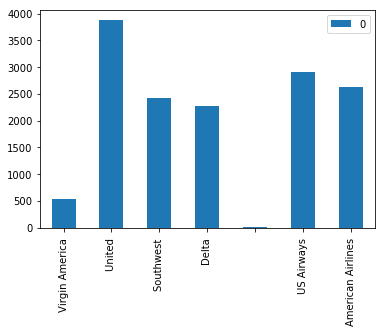

In [33]:
%matplotlib inline
# Plot histogram of tweets per airline


airline_count = Counter(raw_data['airline2'])
ac_df = pd.DataFrame.from_dict(airline_count, orient = 'index')
ac_df.plot(kind='bar')